# Вариант задания: Прогнозирование цен на автомобили
### Бизнес-цели:
Повышение эффективности ценообразования на вторичном рынке автомобилей:
Цель: Разработать модель машинного обучения, которая позволит точно прогнозировать рыночную стоимость автомобилей на вторичном рынке.
Ключевые показатели успеха (KPI):
Точность прогнозирования цены (например, RMSE, MAE).
Сокращение времени на оценку стоимости автомобиля.
Увеличение количества продаж за счет более конкурентоспособных цен.
Оптимизация рекламных бюджетов для онлайн-площадок по продаже автомобилей:
Цель: Использовать прогнозы цен на автомобили для оптимизации таргетинга рекламы и повышения конверсии на онлайн-площадках.
Ключевые показатели успеха (KPI):
Увеличение CTR (Click-Through Rate) рекламных объявлений.
Повышение конверсии (процент пользователей, совершивших покупку после клика на рекламу).
Снижение стоимости привлечения клиента (CPA).
### Цели технического проекта:
Для бизнес-цели 1:
Сбор и подготовка данных:
Очистка данных от пропусков, выбросов и дубликатов.
Преобразование категориальных переменных в числовые.
Разделение данных на обучающую и тестовую выборки.
Разработка и обучение модели:
Исследование различных алгоритмов машинного обучения (линейная регрессия, деревья решений, случайный лес и т.д.).
Обучение моделей на обучающей выборке.
Оценка качества моделей на тестовой выборке с помощью метрик RMSE, MAE и др.
Развертывание модели:
Интеграция модели в существующую систему или разработка нового API для доступа к прогнозам.
Создание веб-интерфейса или мобильного приложения для удобного использования модели.
Для бизнес-цели 2:
Анализ данных о пользователях и поведении:
Анализ данных о просмотрах, кликах и покупках на онлайн-площадке.
Определение сегментов пользователей с разным уровнем интереса к покупке автомобилей.
Разработка рекомендательной системы:
Создание модели, которая будет рекомендовать пользователям автомобили, соответствующие их предпочтениям и бюджету.
Интеграция рекомендательной системы в рекламные кампании.
Оптимизация таргетинга рекламы:
Использование прогнозов цен на автомобили для более точного таргетинга рекламы на пользователей, готовых к покупке.
Тестирование различных стратегий таргетинга и оценка их эффективности.

In [10]:
import pandas as pn
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
df = pn.read_csv(".//static//csv//car_price_prediction.csv")
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


Разделим на 3 выборки


In [12]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", len(train_data))
print("Размер контрольной выборки:", len(val_data))
print("Размер тестовой выборки:", len(test_data))

Размер обучающей выборки: 12311
Размер контрольной выборки: 3078
Размер тестовой выборки: 3848


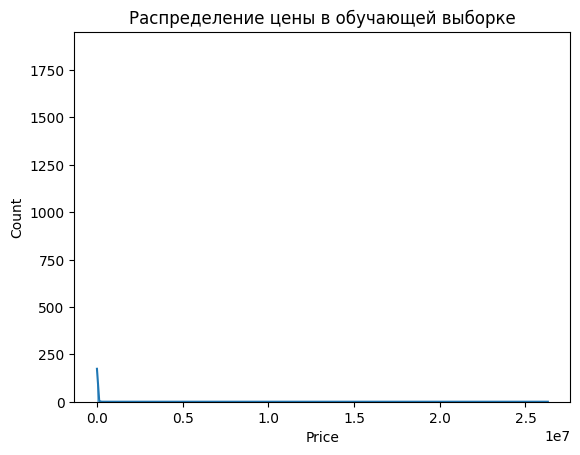

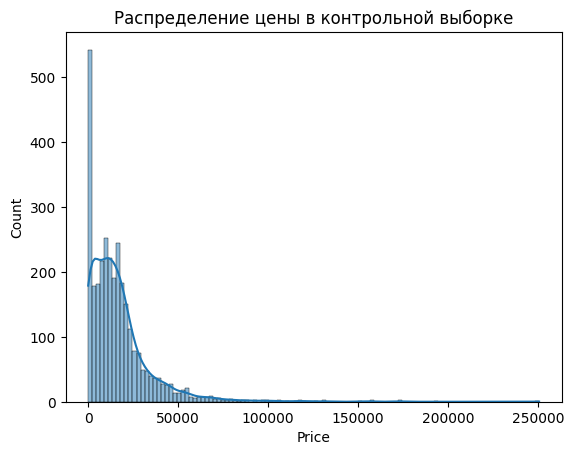

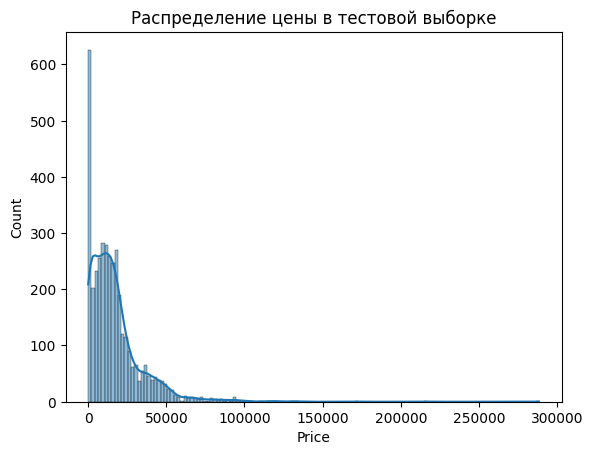

In [8]:
# Пример оценки сбалансированности целевой переменной (цена автомобиля)
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма распределения цены в обучающей выборке
sns.histplot(train_data['Price'], kde=True)
plt.title('Распределение цены в обучающей выборке')
plt.show()

# Гистограмма распределения цены в контрольной выборке
sns.histplot(val_data['Price'], kde=True)
plt.title('Распределение цены в контрольной выборке')
plt.show()

# Гистограмма распределения цены в тестовой выборке
sns.histplot(test_data['Price'], kde=True)
plt.title('Распределение цены в тестовой выборке')
plt.show()

## Процесс конструирования признаков
Задача 1: Прогнозирование цен на автомобили
Цель технического проекта: Разработка модели машинного обучения для точного прогнозирования рыночной стоимости автомобилей.

Задача 2: Оптимизация рекламных бюджетов
Цель технического проекта: Использование прогнозов цен на автомобили для оптимизации таргетинга рекламы и повышения конверсии на онлайн-площадках.


### Унитарное кодирование категориальных признаков (one-hot encoding)

One-hot encoding: Преобразование категориальных признаков в бинарные векторы.

In [13]:
import pandas as pd

# Пример категориальных признаков
categorical_features = ['Model', 'Category', 'Fuel type', 'Gear box type', 'Leather interior']

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)

### Дискретизация числовых признаков 
это процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины). Этот процесс может быть полезен по нескольким причинам

In [16]:
# Пример дискретизации признака 'year'
train_data_encoded['Year bin'] = pd.cut(train_data_encoded['Prod. year'], bins=5, labels=False)
val_data_encoded['Year bin'] = pd.cut(val_data_encoded['Prod. year'], bins=5, labels=False)
test_data_encoded['Year bin'] = pd.cut(test_data_encoded['Prod. year'], bins=5, labels=False)

### Ручной синтез
Создание новых признаков на основе экспертных знаний и логики предметной области. Например, для данных о продаже автомобилей можно создать признак "возраст автомобиля" как разницу между текущим годом и годом выпуска.

In [15]:
# Пример синтеза признака "возраст автомобиля"
train_data_encoded['Age'] = 2024 - train_data_encoded['Prod. year']
val_data_encoded['Age'] = 2024 - val_data_encoded['Prod. year']
test_data_encoded['Age'] = 2024 - test_data_encoded['Prod. year']

Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ['Airbags', 'Age']

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

### Конструирование признаков с применением фреймворка Featuretools

In [51]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='car_data')
es = es.add_dataframe(dataframe_name='cars', dataframe=train_data_encoded, index='id')

# Определение связей между сущностями (если есть)
# es = es.add_relationship(...)

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='cars', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)


c:\Users\Egor\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\entityset\entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
c:\Users\Egor\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\Egor\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
c:\Users\Egor\AppData\Local\Pr

### Оценка качества каждого набора признаков
Предсказательная способность
Метрики: RMSE, MAE, R²

Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.

Скорость вычисления
Методы: Измерение времени выполнения генерации признаков и обучения модели.

Надежность
Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.

Корреляция
Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.

Цельность
Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

In [52]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='car_data')
es = es.add_dataframe(dataframe_name='cars', dataframe=train_data_encoded, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='cars', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)


c:\Users\Egor\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\entityset\entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
c:\Users\Egor\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\Egor\AppData\Local\Programs\Python\Python312\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
c:\Users\Egor\AppData\Local\Pr

c:\Users\Egor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 234661.34107821883
R²: 0.8029264507217629
MAE: 7964.677649030692
Cross-validated RMSE: 259310.71680259163
Train RMSE: 109324.02870848698
Train R²: 0.7887252013114727
Train MAE: 3471.173866063129


c:\Users\Egor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


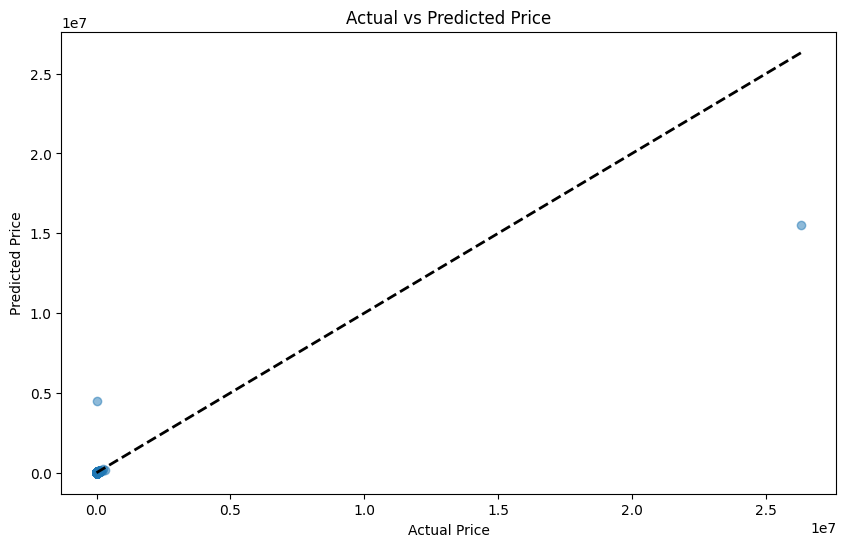

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop('Price', axis=1)
y_train = feature_matrix['Price']
X_val = val_feature_matrix.drop('Price', axis=1)
y_val = val_feature_matrix['Price']
X_test = test_feature_matrix.drop('Price', axis=1)
y_test = test_feature_matrix['Price']

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Cross-validated RMSE: {rmse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

# importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=importance_df)
# plt.title('Feature Importance')
# plt.show()

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

Точность предсказаний: Модель показывает довольно высокий R² (0.8029), что указывает на хорошее объяснение вариации цен. Однако, значения RMSE и MAE довольно высоки, что говорит о том, что модель не очень точно предсказывает цены, особенно для высоких значений.

Переобучение: Разница между RMSE на обучающей и тестовой выборках не очень большая, что указывает на то, что переобучение не является критическим. Однако, стоит быть осторожным и продолжать мониторинг этого показателя.

Кросс-валидация: Значение RMSE после кросс-валидации немного выше, чем на тестовой выборке, что может указывать на некоторую нестабильность модели.